In [ ]:
%run -i helper_functions.py

In [278]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import yfinance as yf
#from helper_functions import *
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
%matplotlib inline
#import matplotlib.p

ModuleNotFoundError: No module named 'MCForecastTools'

In [279]:
# Load .env enviroment variables
load_dotenv()
eia_api_key = os.getenv("EIA_API_KEY")

# dates to get data 
#end_date = date.today()
#start_date = end_date -  relativedelta(years=11)
#start_date

start_date = "2010-01-01"
end_date = "2014-12-30"

In [280]:
# Reading Temperature data and convert it to dataframe
#Data cleanup
# Reading whale returns
df_weather = Path(r"C:\Users\goshl\OneDrive\Documents\GitHub\Project-1\Data\Pittsburg_Area_Temp_2010-2014.csv")
df_weather_data = pd.read_csv(df_weather, index_col="Date", infer_datetime_format=True, parse_dates=True)
df_weather_data.head()

,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
Date,,,,,,,,,
2010-01-01,34,20,27.0,-1.9,38,0,0.02,0.4,1
2010-01-02,20,8,14.0,-14.7,51,0,0.04,0.7,1
2010-01-03,18,6,12.0,-16.7,53,0,T,T,1
2010-01-04,23,16,19.5,-9.1,45,0,0.06,1.5,1
2010-01-05,24,19,21.5,-7.0,43,0,0.07,2,2


In [281]:
# Reading Storage data and convert it to dataframe
df_storage = Path(r"C:\Users\goshl\OneDrive\Documents\GitHub\Project-1\Data\NG_STOR_WKLY_S1_W.csv")
df_storage_data = pd.read_csv(df_storage,index_col="Date", infer_datetime_format=True, parse_dates=True)
df_storage_data.head()


,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly East Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly Midwest Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly Mountain Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly Pacific Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly South Central Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly Salt South Central Region Natural Gas Working Underground Storage (Billion Cubic Feet),Weekly Nonsalt South Central Region Natural Gas Working Underground Storage (Billion Cubic Feet),Unnamed: 9
Date,,,,,,,,,
2010-01-01,3117.0,769.0,900.0,195.0,268.0,985.0,159.0,826.0,NaN
2010-01-08,2850.0,703.0,820.0,185.0,257.0,886.0,123.0,763.0,NaN
2010-01-15,2607.0,642.0,750.0,176.0,246.0,793.0,91.0,702.0,NaN
2010-01-22,2521.0,616.0,710.0,171.0,235.0,789.0,102.0,687.0,NaN
2010-01-29,2406.0,582.0,661.0,164.0,221.0,779.0,108.0,671.0,NaN


In [282]:
# Reading Natural gas data and convert it to dataframe

ng_df_historic = yf.Ticker("NG=F")
#df_historic = df_historic.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits" ], axis=1)
ng_df_historic_data = ng_df_historic.history(start=start_date , end= end_date)
ng_df_historic_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,5.705,5.894,5.705,5.884,78858,0,0
2010-01-05,5.837,5.858,5.615,5.637,99492,0,0
2010-01-06,5.690,6.075,5.650,6.009,140611,0,0
2010-01-07,6.033,6.108,5.763,5.806,135113,0,0
2010-01-08,5.827,5.853,5.621,5.749,101153,0,0


In [283]:
#concatenate Natural gas close price, Average temp and 48 states storage 

storage_48 = (df_storage_data['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'])
ng_df_historic_data_close = ng_df_historic_data['Close']
df_weather_data_Average = df_weather_data['Average']

df = pd.concat([storage_48, ng_df_historic_data_close,df_weather_data_Average], join="inner", axis='columns' ).dropna()
df

,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet),Close,Average
Date,,,
2010-01-08,2850.0,5.749,17.0
2010-01-15,2607.0,5.691,40.0
2010-01-22,2521.0,5.819,36.5
2010-01-29,2406.0,5.131,10.0
2010-02-05,2214.0,5.515,33.0
...,...,...,...
2014-11-21,3432.0,4.266,21.5
2014-12-05,3359.0,3.802,36.0
2014-12-12,3296.0,3.795,29.0


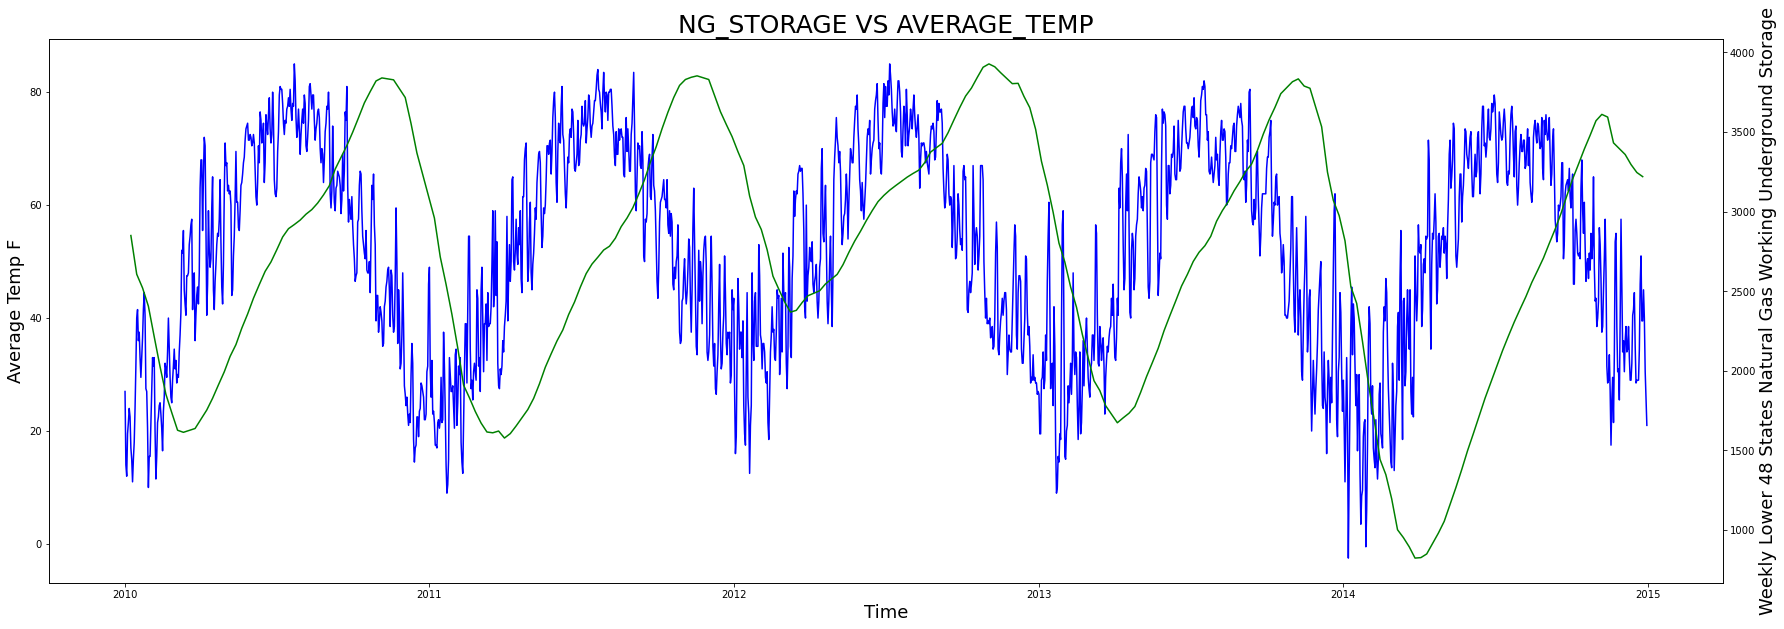

In [284]:

#plot Average temp with Storage

fig, weather_storage_plot = plt.subplots(figsize=(30,10))

df_weather_sorage_plot = weather_storage_plot.twinx()

df_weather_sorage_plot.plot(dfs['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'], 'g-' )
df_weather_sorage_plot.set_ylabel('Weekly Lower 48 States Natural Gas Working Underground Storage', fontsize = 18)
weather_storage_plot.plot(df_weather_data_Average, 'b-' )
weather_storage_plot.set_ylabel('Average Temp F',fontsize = 18)
df_weather_data_Average_plot.plot()
weather_storage_plot.set_xlabel('Time', fontsize = 18)
df_weather_sorage_plot.set_title('NG_STORAGE VS AVERAGE_TEMP', fontsize = 25)
plt.savefig('NG_STORAGE VS AVERAGE_TEMP.png', bbox_inches="tight")
plt.show()

#plt.savefig('NG_STORAGE VS AVERAGE_TEMP.png', bbox_inches="tight")

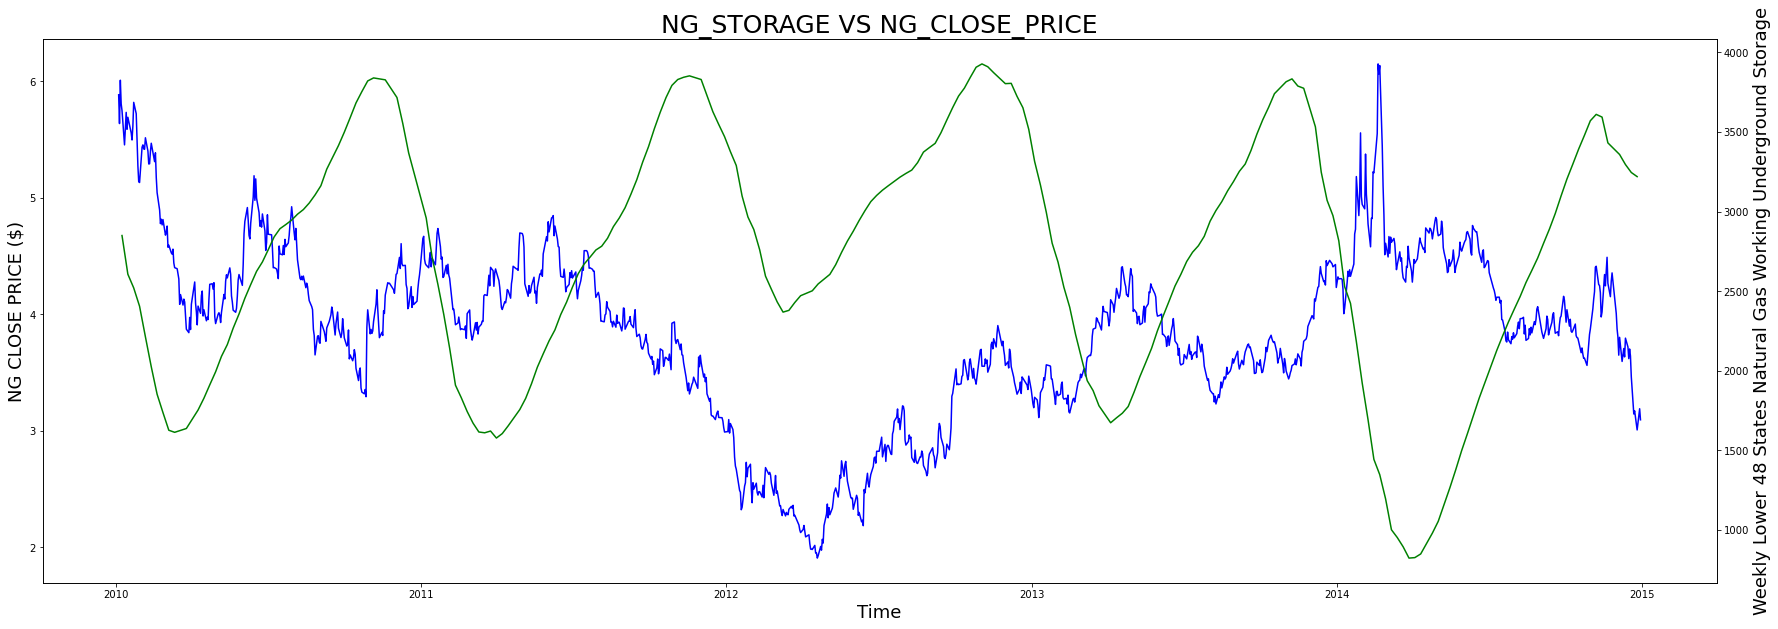

In [285]:
#Plot NG Price with Storage 
fig, ng_df_historic_data_storage_plot = plt.subplots(figsize=(30,10))

df_NG_data_storage_plot = ng_df_historic_data_storage_plot.twinx()
df_NG_data_storage_plot.plot(dfs['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'], 'g-' )
ng_df_historic_data_storage_plot.plot(ng_df_historic_data_close, 'b-' )

df_NG_data_storage_plot.set_ylabel('Weekly Lower 48 States Natural Gas Working Underground Storage',fontsize = 18)
ng_df_historic_data_storage_plot.set_ylabel('NG CLOSE PRICE ($)',fontsize = 18)
ng_df_historic_data_storage_plot.set_xlabel('Time', fontsize = 18)
ng_df_historic_data_storage_plot.set_title('NG_STORAGE VS NG_CLOSE_PRICE', fontsize = 25)
plt.savefig('NG_STORAGE VS NG_CLOSE_PRICE.png', bbox_inches="tight")

plt.show()


In [286]:

#Find Weekly return of the two three joined dataframes

df_close_average_storage_weekly_return = df[['Close', 'Average', 'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)']]
#df_return_close_average
# Drop nulls
# Count nulls
df_return_close_average_storage =df_close_average_storage_weekly_return.pct_change().dropna()
df_return_close_average_storage.head()


,Close,Average,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)
Date,,,
2010-01-15,-0.010089,1.352941,-0.085263
2010-01-22,0.022492,-0.087500,-0.032988
2010-01-29,-0.118233,-0.726027,-0.045617
2010-02-05,0.074839,2.300000,-0.079800
2010-02-12,-0.008522,-0.242424,-0.084914


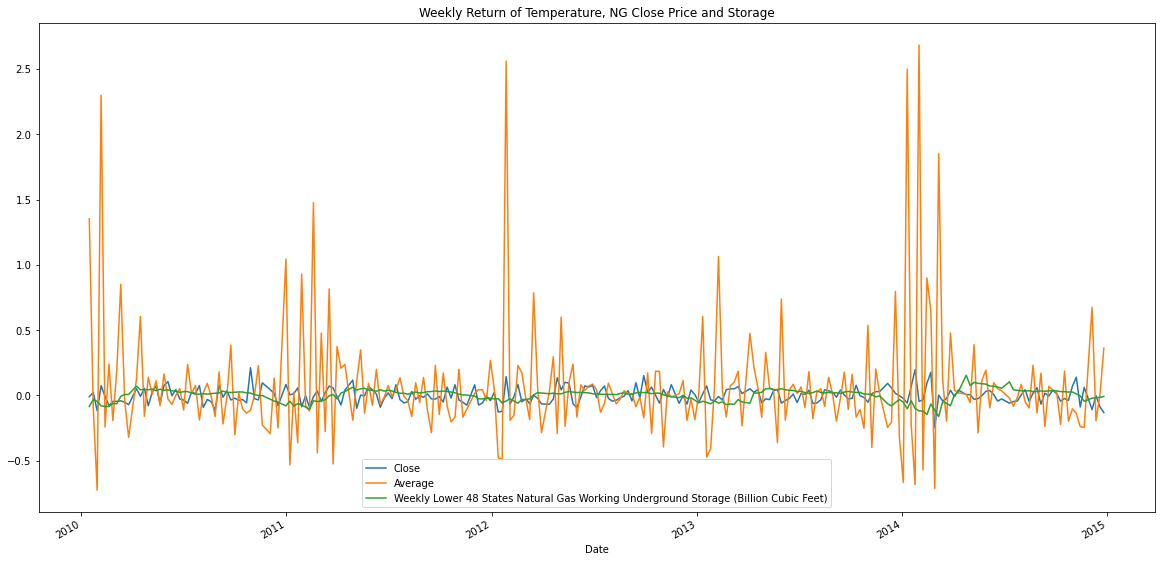

In [287]:
df_return_close_average_storage.plot(figsize = (20,10), title = 'Weekly Return of Temperature, NG Close Price and Storage')
plt.savefig('Weekly Return of Temperature, NG Close Price and Storage.png', bbox_inches="tight")

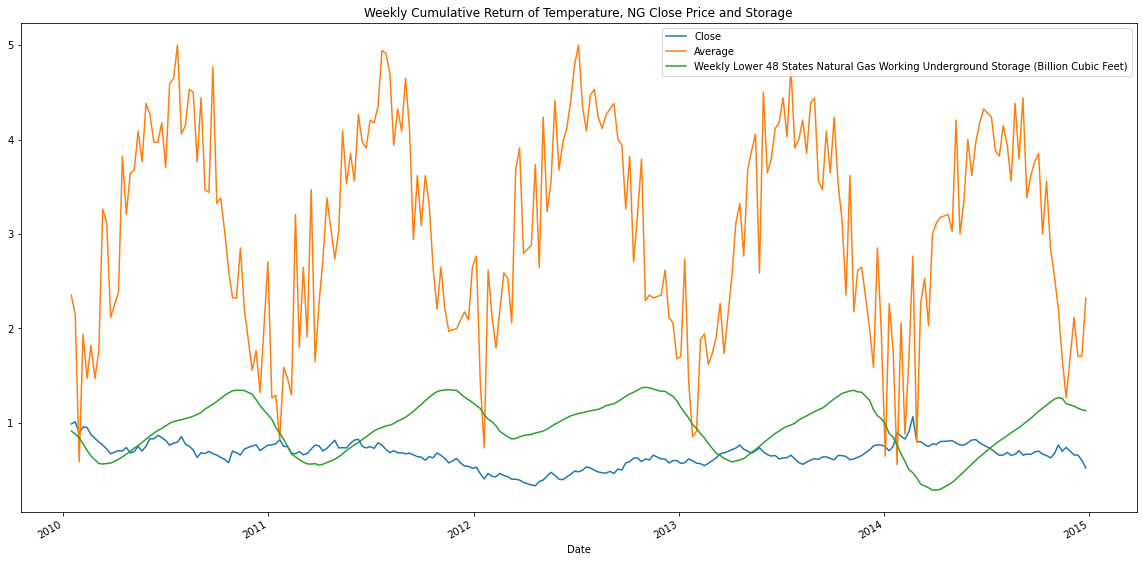

In [294]:
#Cumulative weekly Return Return
Cumulative_returns = (1+df_return_close_average_storage).cumprod()
Cumulative_returns.plot(figsize = (20,10), title = 'Weekly Cumulative Return of Temperature, NG Close Price and Storage')
plt.savefig('Weekly Cumulative Retyrn of Temperature, NG Close Price and Storage.png', bbox_inches="tight")

In [289]:
# Calculate the daily standard deviations
df_return_close_average_std_daily = df_return_close_average_storage.std()
# Calculate the annualized standard deviation (252 trading days)
df_return_close_average_std = df_return_close_average_storage.std()*np.sqrt(252)
print(df_return_close_average_std_daily)
print(df_return_close_average_std)

Close                                                                                  0.060902
Average                                                                                0.456197
Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)    0.045824
dtype: float64
Close                                                                                  0.966785
Average                                                                                7.241898
Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)    0.727433
dtype: float64


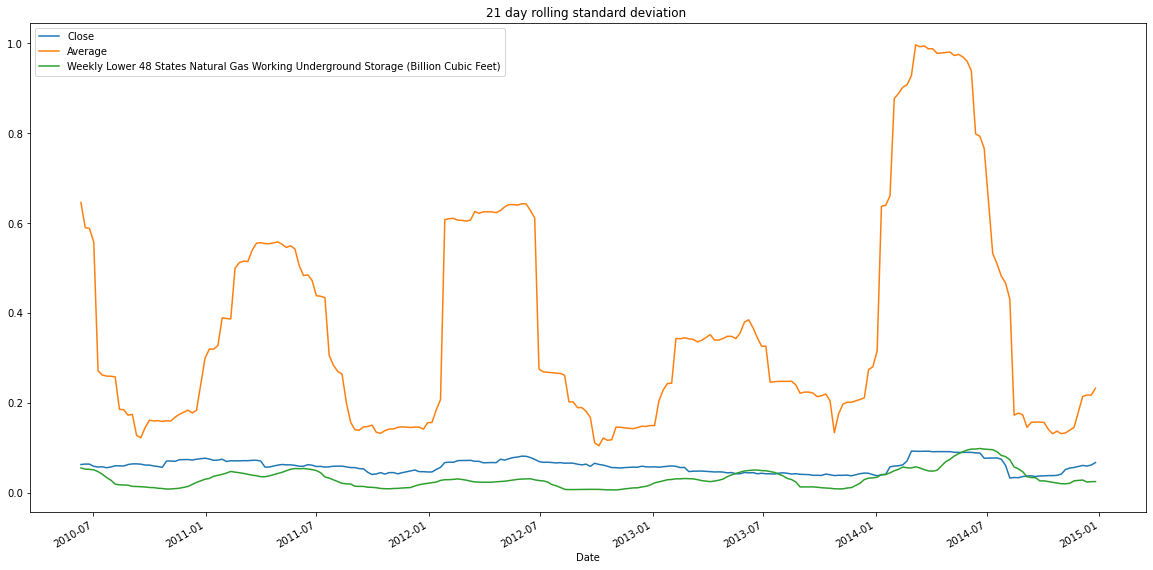

In [290]:
# Calculate rolling standard deviation for 21 days
plot_temp_Average_return_rol_std = df_return_close_average_storage.rolling(window=21).std().dropna()

# Plot rolling standard deviation
plot_temp_Average_return_rol_std.plot(figsize = (20,10), title = '21 day rolling standard deviation ')
plot_temp_Average_return_rol_std
plt.savefig('21 day rolling standard deviation.png', bbox_inches="tight")

In [291]:
# Calculate and plot the correlation
df_return_close_corr = df_return_close_average_storage.corr()
#display correlation matrix
df_return_close_corr


,Close,Average,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)
Close,1.000000,0.049433,0.011559
Average,0.049433,1.000000,-0.248535
Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet),0.011559,-0.248535,1.000000


In [292]:
df_return_close_corr.style.background_gradient(cmap="summer")

,Close,Average,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)
Close,1.000000,0.049433,0.011559
Average,0.049433,1.000000,-0.248535
Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet),0.011559,-0.248535,1.000000


In [293]:
#Monte Carlo Simulation
MC = MCSimulation(
portfolio_data = ng_df_historic_data,
weights = [100],
num_simulation = 500,
num_trading_days = 252*5)

NameError: name 'MCSimulation' is not defined

In [ ]:
%run -i helper_functions.py